## Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a 2.3 million, after receiving over 1000 consumer complaints.The existing database will serve as a repository of public customer complaints filed against Comcast.It will help to pin down what is wrong with Comcast's customer service.

In [ ]:
# Data Dictionary

#Ticket #: Ticket number assigned to each complaint
#Customer Complaint: Description of complaint
#Date: Date of complaint
#Time: Time of complaint
#Received Via: Mode of communication of the complaint
#City: Customer city
#State: Customer state
#Zipcode: Customer zip
#Status: Status of complaint
#Filing on behalf of someone


In [ ]:
#To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.
#
#- Import data into Python environment.
#- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
#- Provide a table with the frequency of complaint types.
#
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
#- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
#- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
#
#Which state has the maximum complaints
#Which state has the highest percentage of unresolved complaints
#- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
#
#The analysis results to be provided with insights wherever applicable.

In [1]:
import pandas as pd

In [126]:
data = pd.read_csv('A:\DataScience with python\Project3\Comcast_telecom_complaints_data.csv')
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [128]:
data.shape

(2224, 11)

### Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [129]:
print(type(data['Date_month_year']))

<class 'pandas.core.series.Series'>


In [130]:
# Convert thecolumn to datetime and extract the Complaint_Month,Conplaint_Day and Complaint_Day_of_Week
data['Date_month_year'] = pd.to_datetime(data['Date_month_year'])
data['Complaint_Month'] = data['Date_month_year'].apply(lambda x: x.month)
data['Complaint_Day'] = data['Date_month_year'].apply(lambda x: str(x.day) + '-' + str(x.month))
data['Complaint_Day_of_Week'] = data['Date_month_year'].apply(lambda x: x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
data['Complaint_Day_of_Week']=data['Complaint_Day_of_Week'].map(dmap)
data.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Complaint_Month,Complaint_Day,Complaint_Day_of_Week
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22-4,Wed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4-8,Tue
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18-4,Sat
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5-7,Sun
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26-5,Tue


Text(0.8, 0.85, 'Max complaints in Jun')

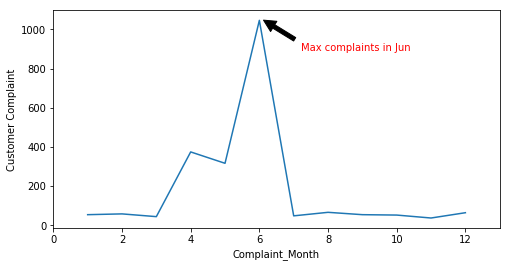

In [131]:
#number of complaints monthly
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
bymonth = data.groupby('Complaint_Month').count().reset_index()
lp = sns.lineplot(x='Complaint_Month', y= 'Customer Complaint', data = bymonth, sort=False,markers = "o")
ax = lp.axes
ax.set_xlim(0,13)
ax.annotate('Max complaints in Jun', color='red',
xy=(6, 1060), xycoords='data',
xytext=(0.8, 0.85), textcoords='axes fraction',
arrowprops=dict(facecolor='black', shrink=0.1),
horizontalalignment='right', verticalalignment='top')


(0, 32)

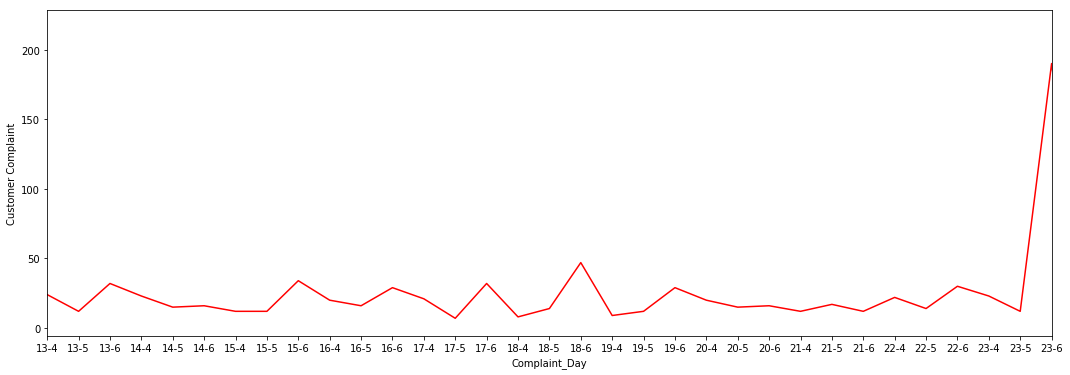

In [133]:
#number of complaints Daily
plt.figure(figsize=(18,6))
byday = data.groupby('Complaint_Day').count().reset_index()
lp = sns.lineplot(x='Complaint_Day', y= 'Customer Complaint', data = byday, sort=False, color = 'red',markers = "o", )
ax = lp.axes
ax.set_xlim(0,32)

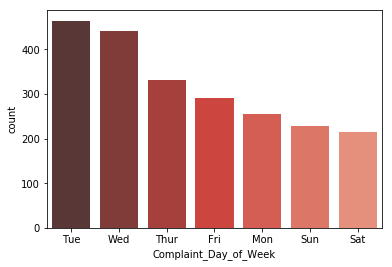

In [134]:
#number of complaints based on created day of the week
sns.countplot(x='Complaint_Day_of_Week', data = data, order=data['Complaint_Day_of_Week'].value_counts().index, palette ="Reds_d")
#More number of complaints on Tuesday and wednesday

### Provide a table with the frequency of complaint types.

In [135]:
data['Customer Complaint'] = data['Customer Complaint'].str.title()
CT_freq = data['Customer Complaint'].value_counts()
CT_freq.head()

Comcast              102
Comcast Data Cap      30
Comcast Internet      29
Comcast Data Caps     21
Comcast Billing       18
Name: Customer Complaint, dtype: int64

### Which complaint types are maximum i.e., around internet, network issues, or across any other domains

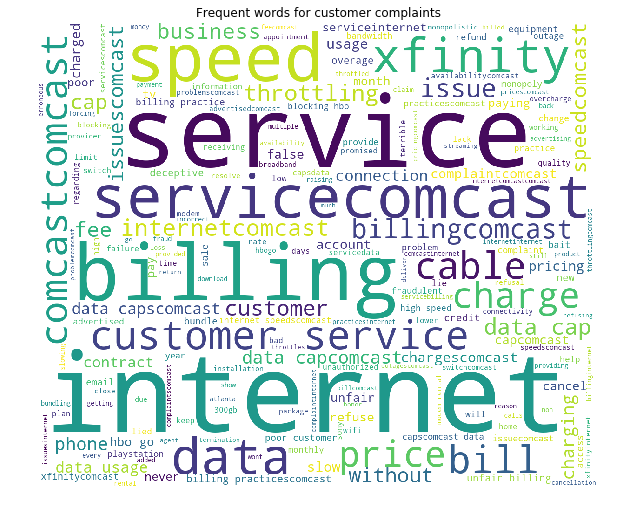

In [162]:
import nltk
from wordcloud import WordCloud, STOPWORDS
common_complaints = data['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()
common_complaints
list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')
for word in list_stops:
    STOPWORDS.add(word)
wordcloud = WordCloud(stopwords=STOPWORDS,
background_color='white',
width=1200,
height=1000).generate(common_complaints)
plt.figure( figsize=(10,12) )
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()

#### Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.


In [137]:
data['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [138]:
data['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [139]:
data['Highlevel_Status'] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in data["Status"]]
data['Highlevel_Status'].unique()

array(['Closed', 'Open'], dtype=object)

### Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

#### Which state has the maximum complaints

In [140]:
data['State'] = data['State'].str.title()
st_cmp = data.groupby(['State','Highlevel_Status']).size().unstack().fillna(0)
st_cmp.head()

Highlevel_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


In [141]:
st_cmp1 = data.groupby(['State']).size().sort_values(ascending = False)
st_cmp1.head()

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

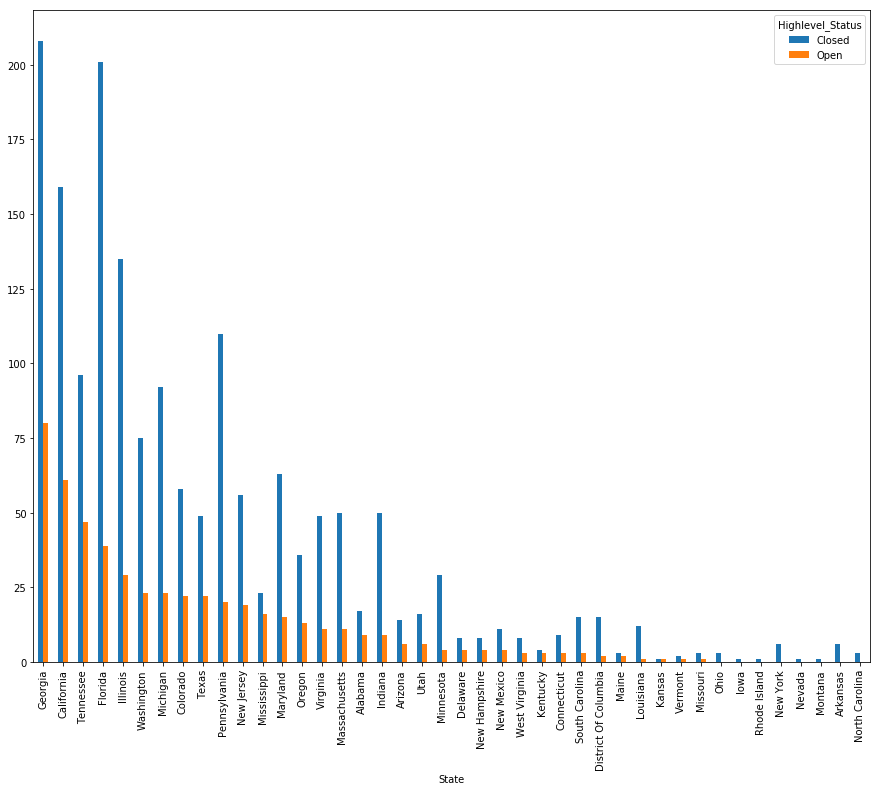

In [142]:
 st_cmp.sort_values('Open',axis = 0,ascending=False).plot(kind="bar", figsize=(15,12))

### Which state has the highest percentage of unresolved complaints
#### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [149]:
unres_comp = data.groupby(["State","Highlevel_Status"]).size().unstack().fillna(0)
unres_comp
unres_comp.sort_values('Open',axis = 0,ascending=False)[:1]

Highlevel_Status,Closed,Open
State,,
Georgia,208.0,80.0


In [158]:
df1 =data.groupby(['Received Via','Highlevel_Status']).size().unstack().reset_index()
df1['percentage_resolved'] = df1['Closed'] / (df1['Open'] + df1['Closed']) * 100
df1

Highlevel_Status,Received Via,Closed,Open,percentage_resolved
0,Customer Care Call,864,255,77.211796
1,Internet,843,262,76.289593


In [157]:
#highest percentage of unresolved complaints
unres_comp['Resolved_cmp_prct'] = unres_comp['Closed']/unres_comp['Closed'].sum()*100
unres_comp['Unresolved_cmp_prct'] = unres_comp['Open']/unres_comp['Open'].sum()*100
unres_comp.sort_values('Unresolved_cmp_prct',axis = 0,ascending=False)[:1]
#Georgia state has highest Unresolved complaints when compared to other states

Highlevel_Status,Closed,Open,Resolved_cmp_prct,Unresolved_cmp_prct
State,,,,
Georgia,208.0,80.0,12.18512,15.473888
